In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [43]:
df=pd.read_csv("cifar10.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [44]:
print(df.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '3063', '3064', '3065', '3066', '3067', '3068', '3069', '3070', '3071',
       'label'],
      dtype='object', length=3073)


In [45]:
X = df.drop("label", axis=1).values
y = df["label"].values

X = X / 255.0
X = X.reshape(-1, 32, 32, 3)

y_cat = to_categorical(y, num_classes=10)

x_train, x_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [46]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', name='conv1'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3683 - loss: 1.7399 - val_accuracy: 0.5450 - val_loss: 1.2818
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.5915 - loss: 1.1574 - val_accuracy: 0.6175 - val_loss: 1.1025
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.6417 - loss: 1.0192 - val_accuracy: 0.6417 - val_loss: 1.0318
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.6853 - loss: 0.9005 - val_accuracy: 0.6488 - val_loss: 1.0136
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.7129 - loss: 0.8192 - val_accuracy: 0.6685 - val_loss: 1.0022


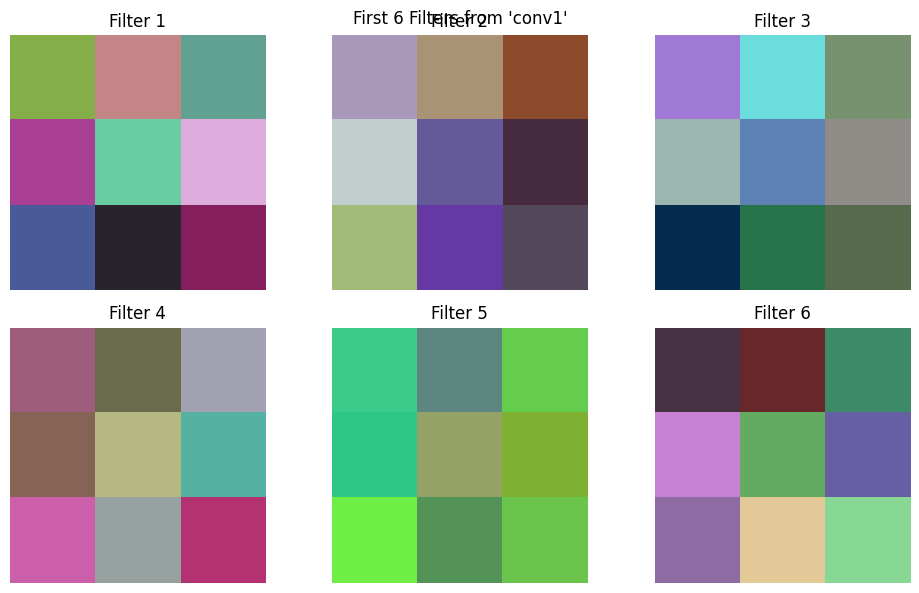

In [53]:
filters, biases = model.get_layer('conv1').get_weights()
filters = (filters - filters.min()) / (filters.max() - filters.min())

plt.figure(figsize=(10, 6))
for i in range(6):
    f = filters[:, :, :, i]
    plt.subplot(2, 3, i + 1)
    plt.imshow(f)
    plt.title(f'Filter {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.suptitle("First 6 Filters from 'conv1'")
plt.show()

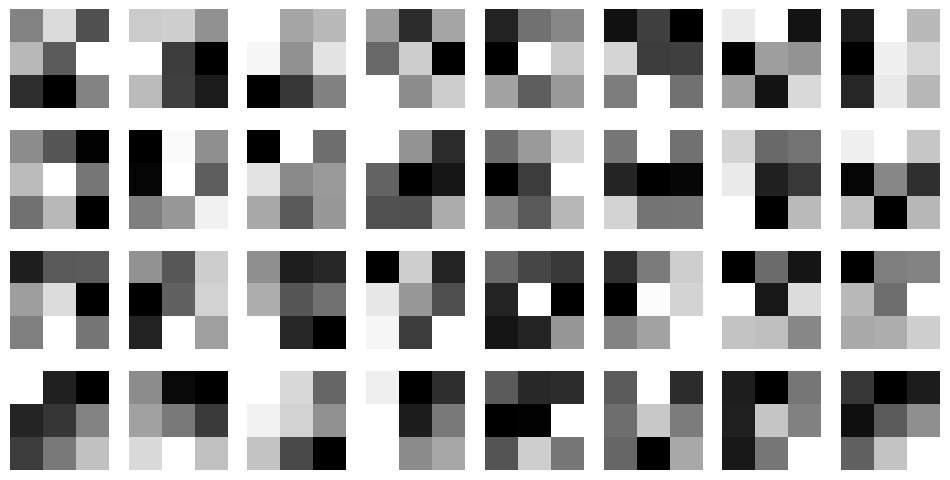

In [71]:
filters, biases = model.get_layer('conv1').get_weights()
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < 32:
        ax.imshow(filters[:, :, :, i][:, :, 0], cmap='gray')
        ax.axis('off')
plt.savefig('filters.png')

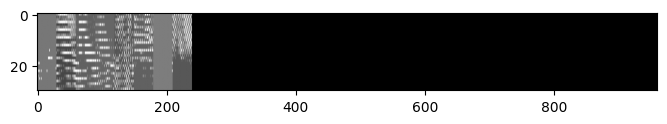

In [77]:
n_features = feature_maps.shape[-1]
size = feature_maps.shape[1]
display_grid = np.zeros((size, size * n_features))
for i in range(min(8, n_features)):
    x = feature_maps[0, :, :, i]
    x -= x.mean()
    x /= x.std()
    x *= 64
    x += 128
    x = np.clip(x, 0, 255).astype('uint8')
    display_grid[:, i * size:(i + 1) * size] = x
plt.figure(figsize=(8, 1))
plt.imshow(display_grid, aspect='auto', cmap='gray')
plt.savefig('feature_maps.png')